# **1. 손 글씨 숫자 데이터셋**
[손글씨 숫자 데이터셋](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)은 0부터 9까지의 숫자를 손글씨로 쓴 흑백 이미지로 구성되어 있으며, 각 이미지는 8x8 픽셀 크기의 64차원 벡터로 표현됩니다. 각 픽셀 값은 0(흰색)에서 16(검은색)까지의 명암값을 가집니다. 이 데이터는 총 1797개의 샘플로 이루어져 있으며, 각 샘플에는 숫자 클래스(0~9)가 레이블로 붙어 있습니다. 주로 분류 알고리즘을 학습시키거나 데이터 시각화, 차원 축소 기법 등을 실험하는 데 사용됩니다.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits  # 사이킷런에서 제공하는 0부터 9까지의 숫자 이미지 데이터셋(총 1,797장의 8x8 흑백 이미지로 구성)
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader  # 중요

digits = load_digits()

X_data = digits['data']
# X_data: 이미지 픽셀 값.
# 각 이미지는 8x8 픽셀 = 64개 숫자 → (1797, 64) 형태의 배열로 저장
# 픽셀 값은 0 ~ 16 사이의 정수 (밝기)
y_data = digits['target']
# y_data는 각 이미지가 나타내는 숫자 레이블(0 ~ 9)로 정답값으로 사용된다.

print(X_data)
print(y_data)
print(X_data.shape)
print(y_data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797,)


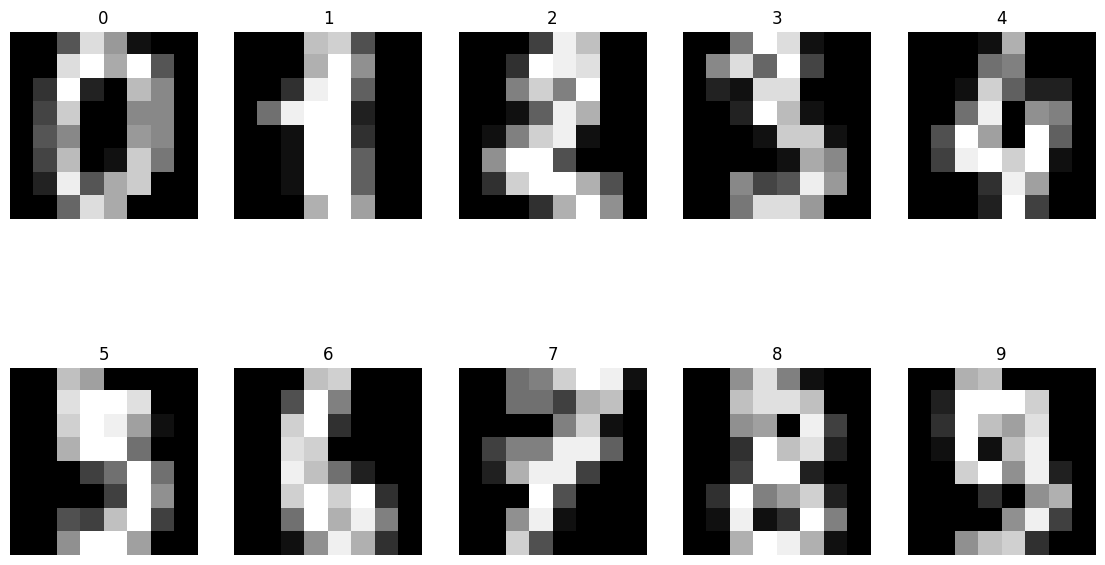

In [2]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8))
# 2행 5열로 구성된 서브플롯(Subplot) 공간 생성. 총 10개 이미지를 시각화할 수 있다.
# figsize=(14, 8): 전체 그림의 크기 설정
# fig: 전체 그림 영역, axes: 각 개별 서브플롯 객체를 담은 배열

for i, ax in enumerate(axes.flatten()):
# axes는 2차원 배열(2행 5열)이기 때문에 .flatten()을 통해 1차원으로 펼친다.
# enumerate()는 인덱스 i와 해당 ax(서브플롯)을 동시에 가져온다.
# 결국 i = 0~9까지 반복하며 ax에 하나씩 이미지 그림을 그리게 된다.
    ax.imshow(X_data[i].reshape((8, 8)), cmap='gray')
    # X_data[i]: i번째 이미지 데이터를 가져온다.
    # .reshape((8, 8)): 이미지는 8x8 픽셀로 구성되었기 때문에 2차원 형태로 변형
    # imshow(...): 이미지 출력
    # cmap='gray': 흑백 컬러맵을 사용하여 픽셀 밝기를 시각화한다.
    ax.set_title(y_data[i])
    # i번째 이미지에 대한 정답 레이블(숫자)을 제목으로 표시
    ax.axis('off')
    # 이미지 주변의 축 눈금이나 테두리를 없애서 깔끔하게 만든다.

### **※ axes.flatten()**

axes.flatten()은 다차원 배열 형태로 구성된 Matplotlib의 서브플롯 배열을 1차원 배열로 변환하는 메서드입니다. Matplotlib에서 다수의 서브플롯을 생성할 때, plt.subplots()는 2차원 배열 형태로 서브플롯 객체를 반환합니다. 이 배열은 각 서브플롯을 접근하기 위해 행과 열의 인덱스를 사용해야 하지만, flatten() 메서드를 사용하면 이 배열을 1차원으로 펼쳐서 각 서브플롯을 단일 인덱스로 순회할 수 있게 됩니다.

In [3]:
X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data)

print(X_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [4]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


# **2. 데이터 로더**
데이터로더(Data Loader)는 데이터셋을 효율적으로 관리하고, 모델 학습 과정에서 데이터를 쉽게 가져올 수 있도록 도와주는 도구입니다. 일반적으로 데이터셋을 배치(batch) 단위로 나누어 모델에 제공하며, 데이터의 크기가 클 경우에도 메모리 효율적으로 처리할 수 있도록 설계되었습니다. 데이터 증강, 셔플링, 병렬 처리와 같은 기능을 지원하여 학습 성능을 향상시키고, 모델 학습과 평가 시 일관된 데이터 제공 방식을 유지합니다. 딥러닝 프레임워크에서는 PyTorch의 DataLoader나 TensorFlow의 tf.data 같은 도구를 통해 쉽게 사용할 수 있습니다.

 ### **※ 데이터로더의 주요 역할**

1. 배치 처리: 데이터를 지정된 크기의 배치로 나누어 모델에 제공.
2. 셔플링: 데이터 순서를 무작위로 섞어 과적합 방지.
3. 병렬 처리: num_workers 옵션을 통해 데이터를 병렬로 로드하여 속도 향상.
4. 반복 처리: 학습 epoch 동안 데이터를 자동으로 반복해서 제공.

In [5]:
loader = DataLoader(
    dataset=list(zip(x_train, y_train)),
    batch_size=64,  # 데이터를 몇개씩 묶어서 제공할 건지,,
    shuffle = True,
    drop_last=False  # (1437/64 = 22.45.. ,) 남은 29개를 버릴건지, 학습할 건지. => 29개로 한번 더 학습하겠다.
)

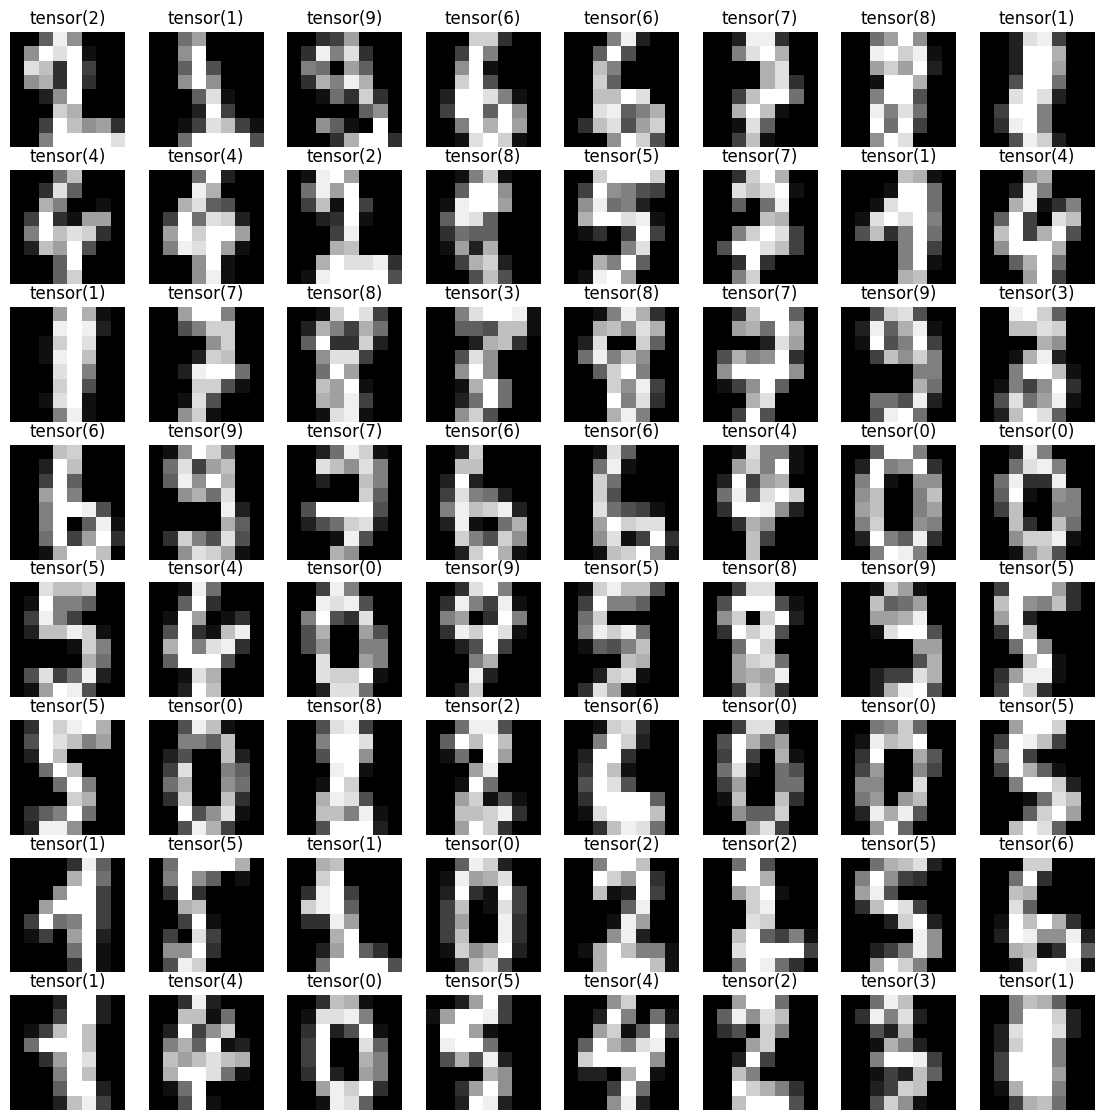

In [6]:
imgs, labels = next(iter(loader))  # 64개 이미지와 64개 라벨이 들어감

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

In [7]:
model = nn.Sequential(
    nn.Linear(64, 10)  # 0부터 9까지 10개.
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [8]:
epochs = 100

for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:  # x_batch에 이미지,  y_batch에 정답을 넣는다.(23번 돌린다.)
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc

avg_loss = sum_losses / len(loader)
avg_acc = sum_accs / len(loader)
print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')


Epoch  100/100 Loss: 0.002346 Accuracy: 100.00%


tensor(5)


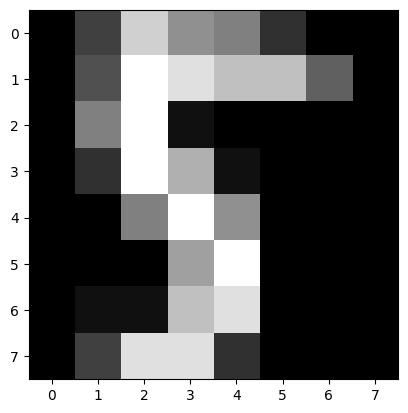

In [9]:
plt.imshow(x_test[10].reshape((8, 8)), cmap='gray')
print(y_test[10])

In [10]:
y_pred = model(x_test)
y_pred[10]

tensor([-2.1631, -7.8651, -2.6971,  2.4307, -7.1230, 17.6377, -6.1512,  2.0450,
         5.2183, -9.3750], grad_fn=<SelectBackward0>)

In [11]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]

tensor([2.5155e-09, 8.4001e-12, 1.4747e-09, 2.4870e-07, 1.7642e-11, 1.0000e+00,
        4.6624e-11, 1.6911e-07, 4.0394e-06, 1.8559e-12],
       grad_fn=<SelectBackward0>)

In [12]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[10][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 1.00
숫자 6일 확률: 0.00
숫자 7일 확률: 0.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00


In [13]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}% 입니다.')

테스트 정확도는  97.78% 입니다.


# **3. 데이터 증강**
데이터 증강(Data Augmentation)은 학습 데이터를 인위적으로 변환하여 데이터셋의 다양성을 높이고 모델의 일반화 성능을 향상시키는 기법입니다. 회전, 크기 조정, 반전, 블러링, 밝기 조정 등 다양한 변환을 적용하여 원본 데이터로부터 새로운 데이터를 생성합니다. 이를 통해 데이터 부족 문제를 완화하고 모델이 특정 패턴에 과적합되지 않도록 도와줍니다. 특히, 이미지나 음성 데이터와 같이 특징이 직관적인 데이터에서 효과적으로 활용되며, 증강된 데이터는 모델이 예측 대상의 다양한 변형에 대해 강하게 학습할 수 있도록 돕습니다.

In [14]:
from torchvision import transforms   # 데이터 변환 기법 모듈
from torch.utils.data import TensorDataset  # 데이터셋을 텐서형으로 변환
from torch.utils.data import Dataset  # 데이터셋 구축 모듈

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)
print(X_train.shape, X_test.shape,  y_train.shape, y_test.shape)


torch.Size([1437, 64]) torch.Size([360, 64]) torch.Size([1437]) torch.Size([360])


In [15]:
# 데이터셋으로 만듦. > 데이터로더에 넣기 편함.
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

**※ transforms.Compose**

여러 데이터 변환(transform) 작업을 순차적으로 적용할 수 있도록 해줍니다. 이미지 데이터 전처리와 증강 과정에서 자주 사용되며, 각 변환을 하나의 리스트로 묶어 실행합니다.


1. transforms.RandomRotation(10)

    - 기능: 이미지를 -10도에서 +10도 사이로 무작위 회전시킵니다.
    - 10은 회전 범위를 나타냅니다.
    - 각 호출 시, -10도 ~ +10도 범위에서 무작위로 각도를 선택하여 이미지를 회전합니다.
2. transforms.RandomAffine(0, shear=5, scale=(0.9, 1.1))

    - 기능: 이미지를 비틀기(shear), 크기 조정(scale) 등의 변환을 수행합니다.
        - 0: 회전(각도) 변환을 수행하지 않음을 의미합니다.
        - shear=5: 이미지를 최대 5도만큼 비스듬하게 비틀기(shear) 변환을 수행합니다.
            - 예: 정사각형이 평행사변형처럼 기울어질 수 있습니다.
        - scale=(0.9, 1.1):
            - 이미지를 0.9배(축소)에서 1.1배(확대) 범위 내에서 무작위 크기 조정을 수행합니다.
            - 각 호출 시, 무작위로 크기가 변경됩니다.

In [16]:
# 데이터 변형 모듈
# Compose: 여러개를 한 번에 변형 시킴
transform = transforms.Compose([
    transforms.RandomRotation(10),  # 데이터를 랜덤하게 각도를 틀어줌(-10 ~ 10도 사이의 무작위 각도로 회전)
    transforms.RandomAffine(0, shear=5, scale=(0.9, 1.1)),  # degree=0 (회전X), shear:입체적으로 틀기, scale: 90%, 110% 무작위 적용
])

In [17]:
class AugmentedDataset(Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        x, y = self.dataset[idx] # self.dataset에서 idx번째의 데이터를 꺼낸다. x: 이미지, y: 라벨
        x = x.view(8, 8).unsqueeze(0)  #  unsqueeze: 차원하나 추가. (8, 8) > (1, 8, 8)
        x = self.transform(x)  # 증강 적용
        return x.flatten(), y   # x.flatten() 결과: [64] 벡터.  라벨 y와 함께 튜플 형태로 반환: (x, y)

In [18]:
augmented_train_dataset = AugmentedDataset(train_dataset, transform)
# 원본 학습데이터셋에 정의된 전처리 함수 transform을 적용하는 새로운 데이터셋을 만들고, 그 결과를 augmented_train_dataset에 저장.
# 이렇게 하면 데이터로더에 넣어 학습 시마다 자동으로 전처리/증강된 데이터를 불러올 수 있다.

In [19]:
len(augmented_train_dataset)

1437

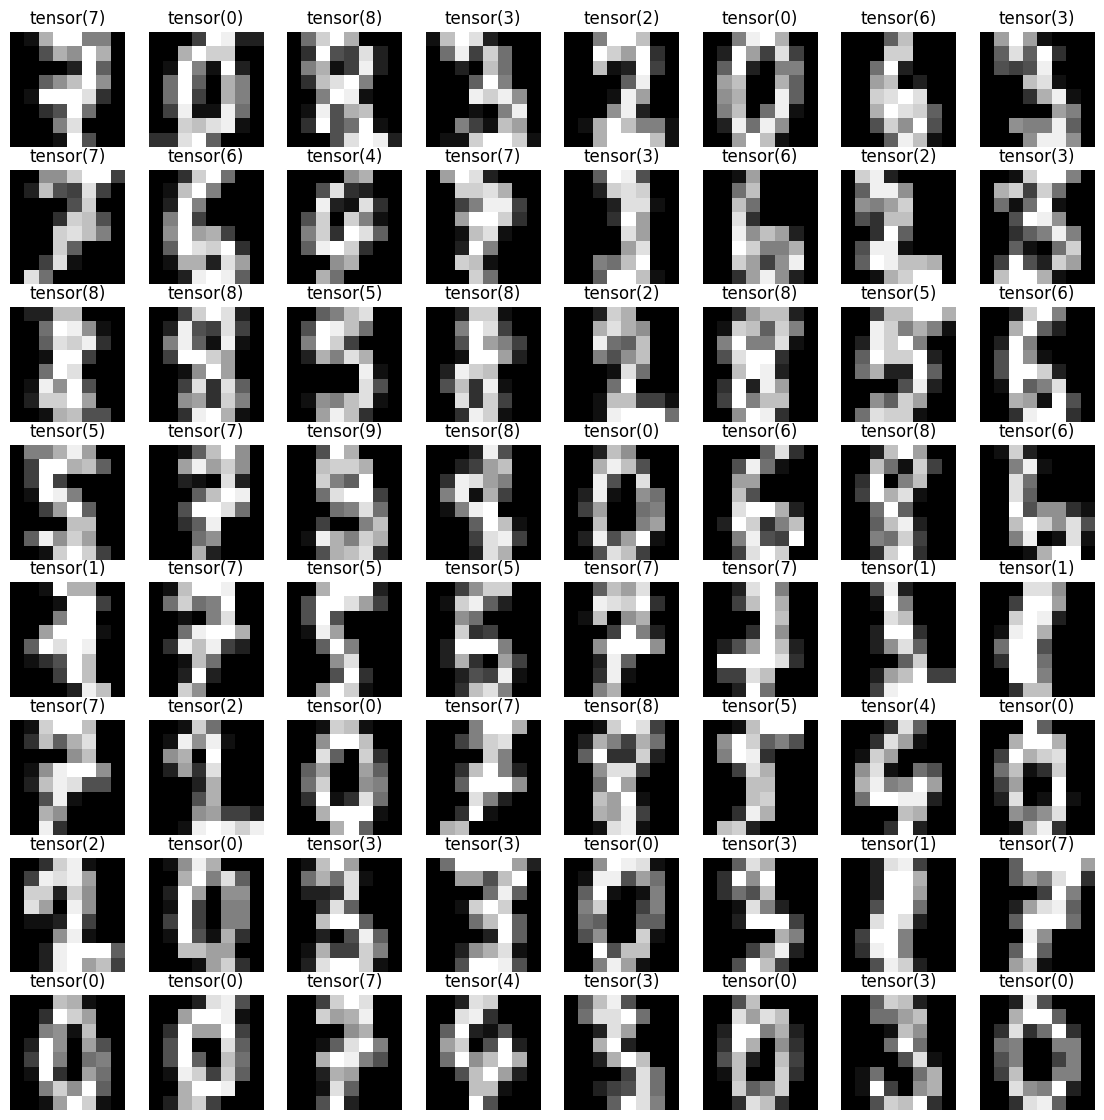

In [20]:
train_loader = DataLoader(augmented_train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # 테스트이므로 섞거나 말거나 상관없음


imgs, labels = next(iter(train_loader))
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

In [21]:
for images, labels in train_loader:
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    break

Image batch shape: torch.Size([64, 64])
Label batch shape: torch.Size([64])


In [22]:
model = nn.Sequential(
    nn.Linear(64, 10)
)

optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

epochs = 100
for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in train_loader:

        y_pred = model(x_batch)  # 23?
        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc

    if epoch % 10 == 0:
        avg_loss = sum_losses / len(train_loader)
        avg_acc = sum_accs / len(train_loader)
        print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')


Epoch    0/100 Loss: 1.542333 Accuracy: 61.44%
Epoch   10/100 Loss: 0.071644 Accuracy: 98.02%
Epoch   20/100 Loss: 0.045178 Accuracy: 98.97%
Epoch   30/100 Loss: 0.034102 Accuracy: 99.18%
Epoch   40/100 Loss: 0.024775 Accuracy: 99.05%
Epoch   50/100 Loss: 0.018563 Accuracy: 99.46%
Epoch   60/100 Loss: 0.015844 Accuracy: 99.46%
Epoch   70/100 Loss: 0.015598 Accuracy: 99.46%
Epoch   80/100 Loss: 0.014405 Accuracy: 99.73%
Epoch   90/100 Loss: 0.030215 Accuracy: 98.90%
Epoch  100/100 Loss: 0.047998 Accuracy: 98.71%


tensor(7)


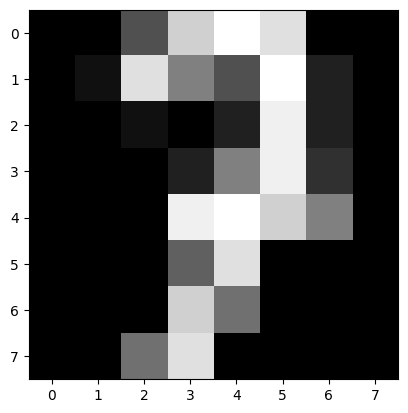

In [23]:
plt.imshow(x_test[11].reshape((8, 8)), cmap='gray')
print(y_test[11])

In [24]:
y_pred = model(x_test)
y_pred[11]

tensor([-15.1991,  -9.8465,  -6.4433,   9.1362, -11.2059,  -4.4298, -29.3907,
         22.9432, -11.3371,   5.2536], grad_fn=<SelectBackward0>)

In [25]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[11]

tensor([2.7228e-17, 5.7495e-15, 1.7282e-13, 1.0086e-06, 1.4765e-15, 1.2943e-12,
        1.8692e-23, 1.0000e+00, 1.2949e-15, 2.0774e-08],
       grad_fn=<SelectBackward0>)

In [26]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[11][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 0.00
숫자 6일 확률: 0.00
숫자 7일 확률: 1.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00
